> <http://pytorch.org/tutorials/>

# Deep Learning with PyTorch: A 60 Minute Blitz

## What is PyTorch?

### Tensors

In [57]:
import torch
# Construct a 5x3 matrix, uninitialized
x = torch.Tensor(5, 3)
x


1.00000e-11 *
  0.0000 -0.0000 -9.4234
 -0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000 -0.0000  0.0000
[torch.FloatTensor of size 5x3]

In [58]:
# Construct a randomly initialized matrix
x = torch.rand(5, 3)
x


 0.5546  0.8861  0.7490
 0.7730  0.3416  0.9053
 0.3250  0.5934  0.9704
 0.1682  0.1921  0.0252
 0.3531  0.4359  0.4126
[torch.FloatTensor of size 5x3]

In [59]:
x.size()

torch.Size([5, 3])

### operations

In [60]:
y = torch.rand(5, 3)
y


 0.3644  0.1879  0.3846
 0.1427  0.3780  0.4711
 0.3859  0.9335  0.0805
 0.0039  0.4825  0.0597
 0.0950  0.1461  0.0616
[torch.FloatTensor of size 5x3]

In [61]:
# Addition: syntax 1
x + y


 0.9190  1.0739  1.1336
 0.9157  0.7196  1.3765
 0.7109  1.5269  1.0509
 0.1721  0.6746  0.0849
 0.4482  0.5820  0.4741
[torch.FloatTensor of size 5x3]

In [62]:
# Addition: syntax 2
torch.add(x, y)


 0.9190  1.0739  1.1336
 0.9157  0.7196  1.3765
 0.7109  1.5269  1.0509
 0.1721  0.6746  0.0849
 0.4482  0.5820  0.4741
[torch.FloatTensor of size 5x3]

In [63]:
# Addition: giving an output tensor
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 0.9190  1.0739  1.1336
 0.9157  0.7196  1.3765
 0.7109  1.5269  1.0509
 0.1721  0.6746  0.0849
 0.4482  0.5820  0.4741
[torch.FloatTensor of size 5x3]



In [64]:
# Addition: in-place
y.add_(x)
print(y)


 0.9190  1.0739  1.1336
 0.9157  0.7196  1.3765
 0.7109  1.5269  1.0509
 0.1721  0.6746  0.0849
 0.4482  0.5820  0.4741
[torch.FloatTensor of size 5x3]



In [65]:
# You can use standard numpy-like indexing with all bells and whistles!
x[:, 1]


 0.8861
 0.3416
 0.5934
 0.1921
 0.4359
[torch.FloatTensor of size 5]

### Converting torch Tensor to numpy Array

In [66]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [67]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [68]:
# See how the numpy array changed in value.
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


### Converting numpy Array to torch Tensor

In [69]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



All the Tensors on the CPU except a CharTensor support converting to NumPy and back.

## Autograd: automatic differentiation

Central to all neural networks in PyTorch is the `autograd` package. Let’s first briefly visit this, and we will then go to training our first neural network.

The autograd package provides automatic differentiation for all operations on Tensors.

### Variable

`autograd.Variable` is the central class of the package. It wraps a Tensor, and supports nearly all of operations defined on it. Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the raw tensor through the `.data` attribute, while the gradient w.r.t. this variable is accumulated into `.grad`.

![](http://pytorch.org/tutorials/_images/Variable.png)

There’s one more class which is very important for autograd implementation - a `Function`.

`Variable` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each variable has a `.grad_fn` attribute that references a Function that has created the `Variable` (except for Variables created by the user - their `grad_fn` is None).

In [70]:
import torch
from torch.autograd import Variable

x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [71]:
# Do an operation of variable:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [72]:
# y was created as a result of an operation, so it has a grad_fn.
print(y.grad_fn)

In [73]:
# Do more operations on y
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



### Gradients

In [74]:
# let’s backprop now out.backward() is equivalent to doing out.backward(torch.Tensor([1.0]))
out.backward()
# print gradients d(out)/dx
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [75]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 1049.6848
  689.9095
  344.3600
[torch.FloatTensor of size 3]



In [76]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



Read Later:

Documentation of Variable and Function is at <http://pytorch.org/docs/autograd>

PyTorch中的backward: <https://zhuanlan.zhihu.com/p/29923090>

## Neural Networks

Neural networks can be constructed using the `torch.nn` package.

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)` that returns the `output`.

![](http://pytorch.org/tutorials/_images/mnist.png)

A typical training procedure for a neural network is as follows:

* Define the neural network that has some learnable parameters (or weights)
* Iterate over a dataset of inputs
* Process input through the network
* Compute the loss (how far is the output from being correct)
* Propagate gradients back into the network’s parameters
* Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

### Define the network

In [77]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the `Tensor` operations in the `forward` function.

The learnable parameters of a model are returned by `net.parameters()`

In [78]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


The input to the forward is an `autograd.Variable`, and so is the output.

In [79]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
1.00000e-02 *
  0.6111  8.0432 -4.8642  0.6639 -5.2607 -3.6943 -0.3010  5.8502 -5.4432  3.2274
[torch.FloatTensor of size 1x10]



In [80]:
# Zero the gradient buffers of all parameters and backprops with random gradients:
net.zero_grad()
out.backward(torch.randn(1, 10))

> `torch.nn` only supports mini-batches The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.
>
>For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.
>
>If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

Recap:
* `torch.Tensor` - A multi-dimensional array.
* `autograd.Variable` - Wraps a Tensor and records the history of operations applied to it. Has the same API as a `Tensor`, with some additions like `backward()`. Also holds the gradient w.r.t. the tensor.
* `nn.Module` - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
* `nn.Parameter` - A kind of Variable, that is automatically registered as a parameter when assigned as an attribute to a `Module`.
* `autograd.Function` - Implements forward and backward definitions of an autograd operation. Every `Variable` operation, creates at least a single `Function` node, that connects to functions that created a `Variable` and encodes its history.

At this point, we covered:
* Defining a neural network
* Processing inputs and calling backward.

Still Left:
* Computing the loss
* Updating the weights of the network


### Loss Function

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different [loss functions](http://pytorch.org/docs/nn.html#loss-functions) under the `nn` package .

In [81]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss() # the mean-squared error, for example

loss = criterion(output, target)
print(loss)

Variable containing:
 38.5335
[torch.FloatTensor of size 1]



Now, if you follow `loss` in the backward direction, using it’s .grad_fn attribute, you will see a graph of computations that looks like this:
```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```

So, when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their `.grad` Variable accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [82]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients

In [83]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
 0.0767
-0.0474
-0.0680
-0.2139
 0.0619
 0.0466
[torch.FloatTensor of size 6]



### Update the weights

The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):
```
weight = weight - learning_rate * gradient
```
We can implement this using simple python code:
```
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```
However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: `torch.optim` that implements all these methods.

In [85]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Training a classifier

### What about data?

Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.
* For images, packages such as Pillow, OpenCV are useful.
* For audio, packages such as scipy and librosa
* For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful.

Specifically for `vision`, we have created a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`.

### Training an image classifier

#### 1. Loading and normalizing CIFAR10

In [86]:
import torch
import torchvision
import torchvision.transforms as transforms

# The output of torchvision datasets are PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


horse  deer  ship  bird


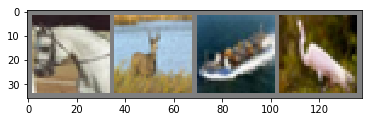

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### 2. Define a Convolution Neural Network

In [92]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### 3. Define a Loss function and optimizer

In [93]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 4. Train the network

In [95]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.198
[1,  4000] loss: 1.836
[1,  6000] loss: 1.634
[1,  8000] loss: 1.543
[1, 10000] loss: 1.480
[1, 12000] loss: 1.466
[2,  2000] loss: 1.376
[2,  4000] loss: 1.335
[2,  6000] loss: 1.325
[2,  8000] loss: 1.306
[2, 10000] loss: 1.287
[2, 12000] loss: 1.255
Finished Training


#### 5. Test the network on the test data

GroundTruth:    cat  ship  ship plane


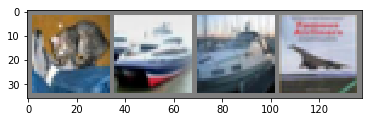

In [96]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [97]:
outputs = net(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Let us look at how the network performs on the whole dataset.

In [98]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [99]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 72 %
Accuracy of  bird : 54 %
Accuracy of   cat : 33 %
Accuracy of  deer : 47 %
Accuracy of   dog : 45 %
Accuracy of  frog : 69 %
Accuracy of horse : 64 %
Accuracy of  ship : 73 %
Accuracy of truck : 47 %


### Training on GPU

Just like how you transfer a Tensor on to the GPU, you transfer the neural net onto the GPU. This will recursively go over all modules and convert their parameters and buffers to CUDA tensors:
```
net.cuda()
```
Remember that you will have to send the inputs and targets at every step to the GPU too:
```
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
```

### Training on multiple GPUs
If you want to see even more MASSIVE speedup using all of your GPUs, please check out [Optional: Data Parallelism](http://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html).